<a href="https://colab.research.google.com/github/061095/biblioteca_pandas_/blob/main/C%C3%B3pia_de_Desafio_4_Construindo_um_modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aplicarconhecimentos de regressão para estruturar uma
análise em um dataset de campanha de marketing.

Construindo um modelo de Regressão para marketing

Arquivo do Desafio:

Python Graph Gallery → Repositório com o passo a passo de como

*  Python Graph Gallery → Repositório com o passo a passo de como
*   SciKit Learn → Documentação com os principais modelos utilizados para clusterização




In [ ]:
import pandas as pd

In [ ]:
dados_marketing= pd.read_csv("/content/MKT.csv")

In [ ]:
dados_marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
dados_marketing.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [ ]:
dados_marketing.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
dados_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
dados_marketing[["youtube", "facebook", "newspaper", "sales"]].describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
agg_you_sales= dados_marketing.groupby(["youtube"])["sales"].agg("mean").reset_index()
agg_you_sales

,youtube,sales
0,0.84,1.92
1,4.92,3.84
2,6.48,6.36
3,8.76,6.60
4,9.36,7.92
...,...,...
160,347.64,30.48
161,348.84,15.36
162,351.48,25.68
163,352.32,24.84


In [ ]:
agg_face_sales= dados_marketing.groupby(["facebook"])["sales"].agg("mean").reset_index()
agg_face_sales

,facebook,sales
0,0.00,10.56
1,0.36,10.44
2,0.48,6.36
3,0.96,11.28
4,1.56,12.12
...,...,...
140,57.36,20.04
141,58.68,32.40
142,58.80,30.06
143,59.28,23.04


In [ ]:
agg_news_sales= dados_marketing.groupby(["newspaper"])["sales"].agg("mean").reset_index()
agg_news_sales

,newspaper,sales
0,0.36,20.88
1,1.08,11.16
2,2.04,24.84
3,2.16,24.84
4,2.52,6.84
...,...,...
143,90.72,23.04
144,95.04,19.08
145,101.76,14.28
146,107.28,10.44


In [ ]:
import seaborn as sns

<Axes: xlabel='youtube', ylabel='sales'>

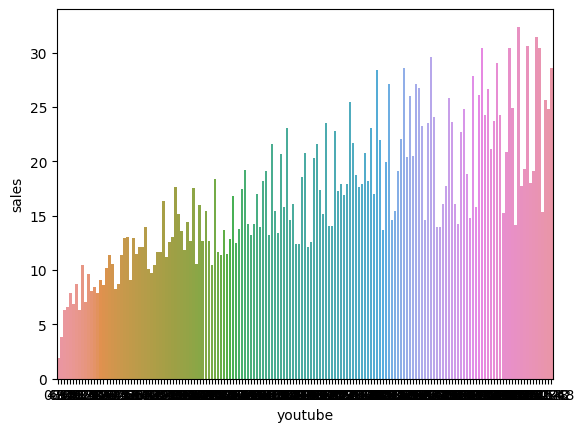

In [ ]:
sns.barplot(data=agg_you_sales, x="youtube", y="sales")

<Axes: xlabel='facebook', ylabel='sales'>

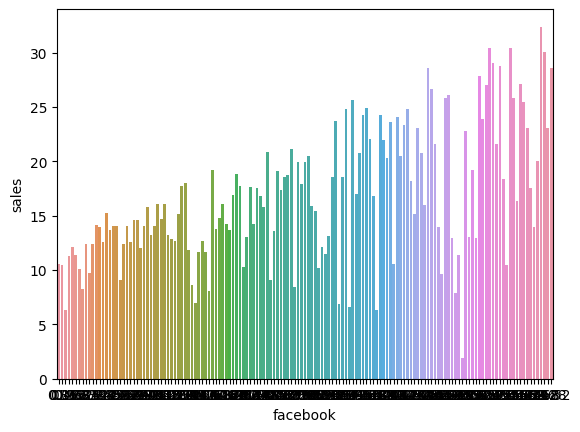

In [ ]:
sns.barplot(data=agg_face_sales, x="facebook", y="sales")

<Axes: xlabel='newspaper', ylabel='sales'>

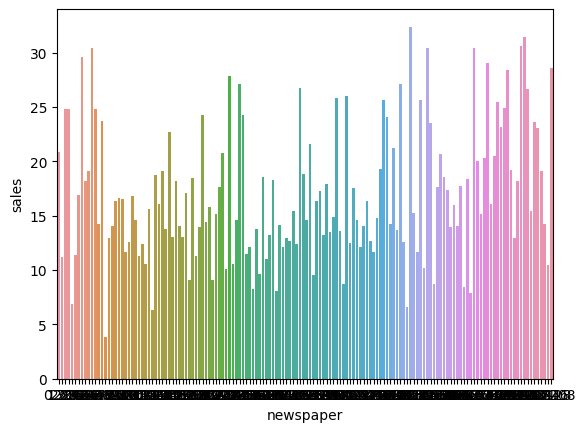

In [ ]:
sns.barplot(data= agg_news_sales, x="newspaper", y="sales")

In [ ]:
agg_youtube= dados_marketing[["youtube"]]

<Axes: xlabel='youtube', ylabel='Count'>

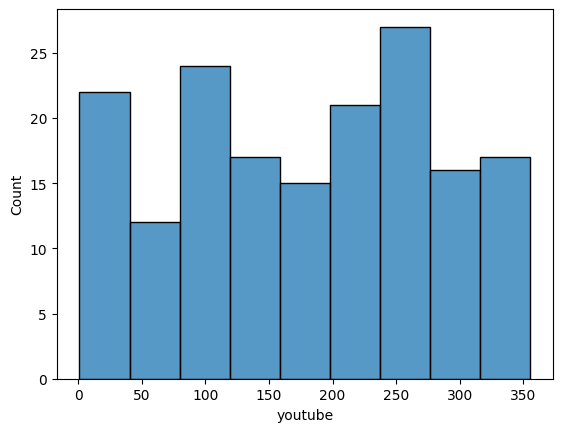

In [ ]:
sns.histplot(data=agg_youtube, x= "youtube")

In [ ]:
agg_facebook= dados_marketing[["facebook"]]

<Axes: xlabel='facebook', ylabel='Count'>

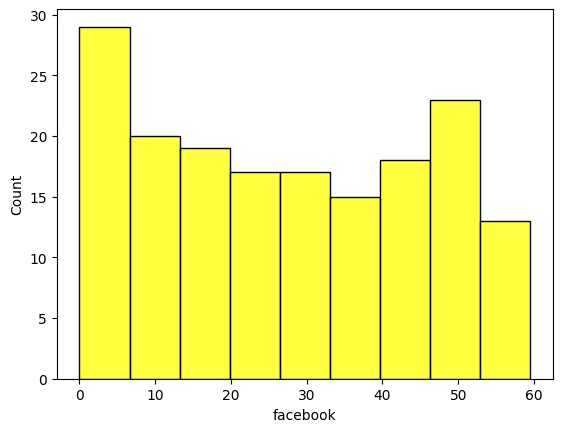

In [ ]:
sns.histplot(data=agg_facebook, x= "facebook", color="yellow")

In [ ]:
agg_newspaper= dados_marketing[["newspaper"]]

<Axes: xlabel='newspaper', ylabel='Count'>

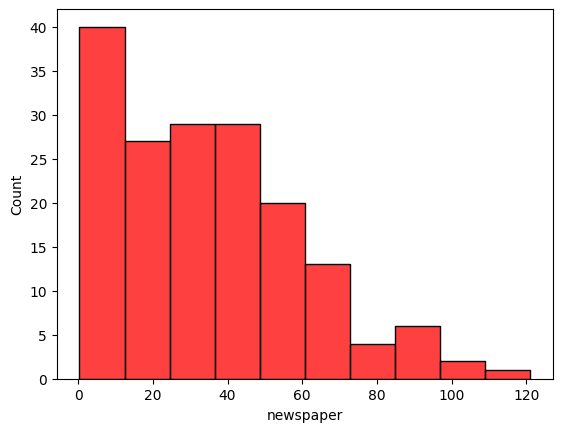

In [ ]:
sns.histplot(data=agg_newspaper, x= "newspaper", color= "red")

In [ ]:
dados_marketing.groupby("youtube").sales.nunique().sort_values(ascending=False)

youtube
237.12    2
91.68     2
266.88    2
221.88    2
131.76    2
         ..
116.64    1
120.48    1
123.24    1
125.52    1
355.68    1
Name: sales, Length: 165, dtype: int64

In [ ]:
dados_marketing.groupby("facebook").sales.nunique().sort_values(ascending=False)

facebook
4.92     3
6.84     3
51.60    2
5.88     2
50.40    2
        ..
17.40    1
16.80    1
14.52    1
14.40    1
59.52    1
Name: sales, Length: 145, dtype: int64

In [ ]:
dados_marketing.groupby("newspaper").sales.nunique().sort_values(ascending=False)

newspaper
30.72     3
11.16     3
10.44     3
37.92     2
17.04     2
         ..
21.12     1
20.40     1
19.92     1
19.20     1
121.08    1
Name: sales, Length: 148, dtype: int64

In [ ]:
ana1_youtube=dados_marketing.query("youtube==237.12")

In [ ]:
ana1_youtube.head()

,youtube,facebook,newspaper,sales
67,237.12,4.20,7.08,14.04
123,237.12,27.96,17.04,19.92


In [ ]:
ana2_facebook=dados_marketing.query("facebook==4.92")

In [ ]:
ana2_facebook.head()

,youtube,facebook,newspaper,sales
6,348.84,4.92,10.20,15.36
52,287.76,4.92,44.28,14.76
163,20.64,4.92,37.92,7.08


In [ ]:
ana3_newspaper=dados_marketing.query("newspaper==30.72")

In [ ]:
ana3_newspaper.head()

,youtube,facebook,newspaper,sales
79,15.72,0.48,30.72,6.36
87,167.04,17.16,30.72,14.64
133,226.08,21.72,30.72,17.88


In [ ]:
dados_marketing= pd.read_csv("/content/MKT.csv", sep =",")

In [ ]:
dados_marketing.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
dados_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
dados_marketing.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
import matplotlib.pyplot as plt


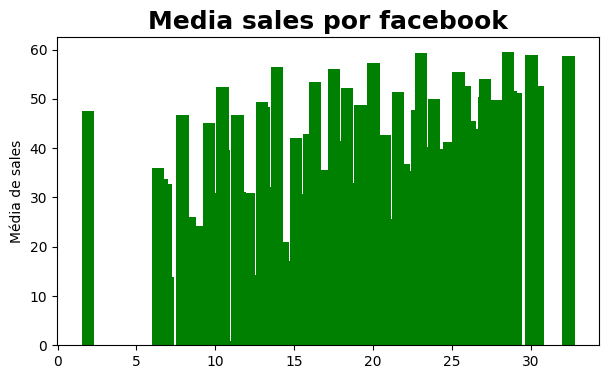

In [ ]:
fig=plt.figure(figsize=(7,4))
plt.bar (agg_face_sales["sales"], agg_face_sales["facebook"], color= "green")
plt.ylabel ("Média de sales")
plt.title("Media sales por facebook", loc= "center", fontsize="18", fontweight="bold", color="black");

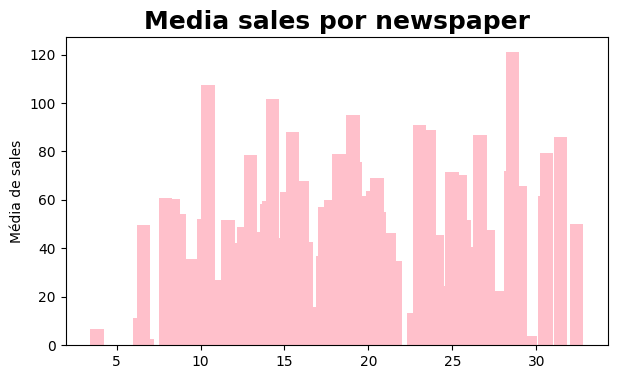

In [ ]:
fig=plt.figure(figsize=(7,4))
plt.bar (agg_news_sales["sales"], agg_news_sales["newspaper"], color= "pink")
plt.ylabel ("Média de sales")
plt.title("Media sales por newspaper", loc= "center", fontsize="18", fontweight="bold", color="black");

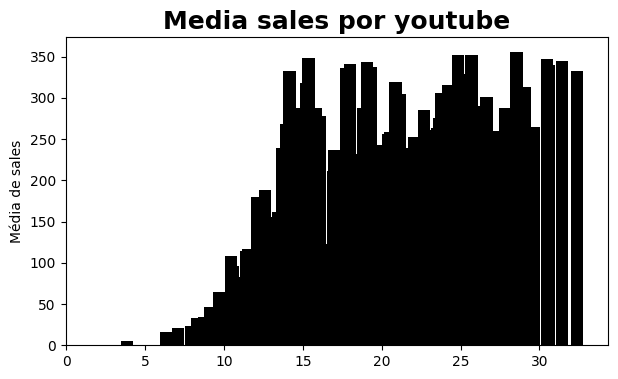

In [ ]:
fig=plt.figure(figsize=(7,4))
plt.bar (agg_you_sales["sales"], agg_you_sales["youtube"], color= "black")
plt.ylabel ("Média de sales")
plt.title("Media sales por youtube", loc= "center", fontsize="18", fontweight="bold", color="black");

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
px.bar(agg_youtube_sales, x="youtube", y="sales")

In [ ]:
px.bar(agg_news_sales, x="newspaper", y="sales")

In [ ]:
px.bar(agg_face_sales, x="facebook", y="sales")

In [ ]:
fig=px.box(dados_marketing, x="youtube")
fig.update_traces(line_color="red")

In [ ]:
fig=px.box(dados_marketing, x="facebook")
fig.update_traces(line_color="blue")

In [ ]:
fig=px.box(dados_marketing, x="newspaper")
fig.update_traces(line_color="purple")

In [ ]:
import seaborn as sns


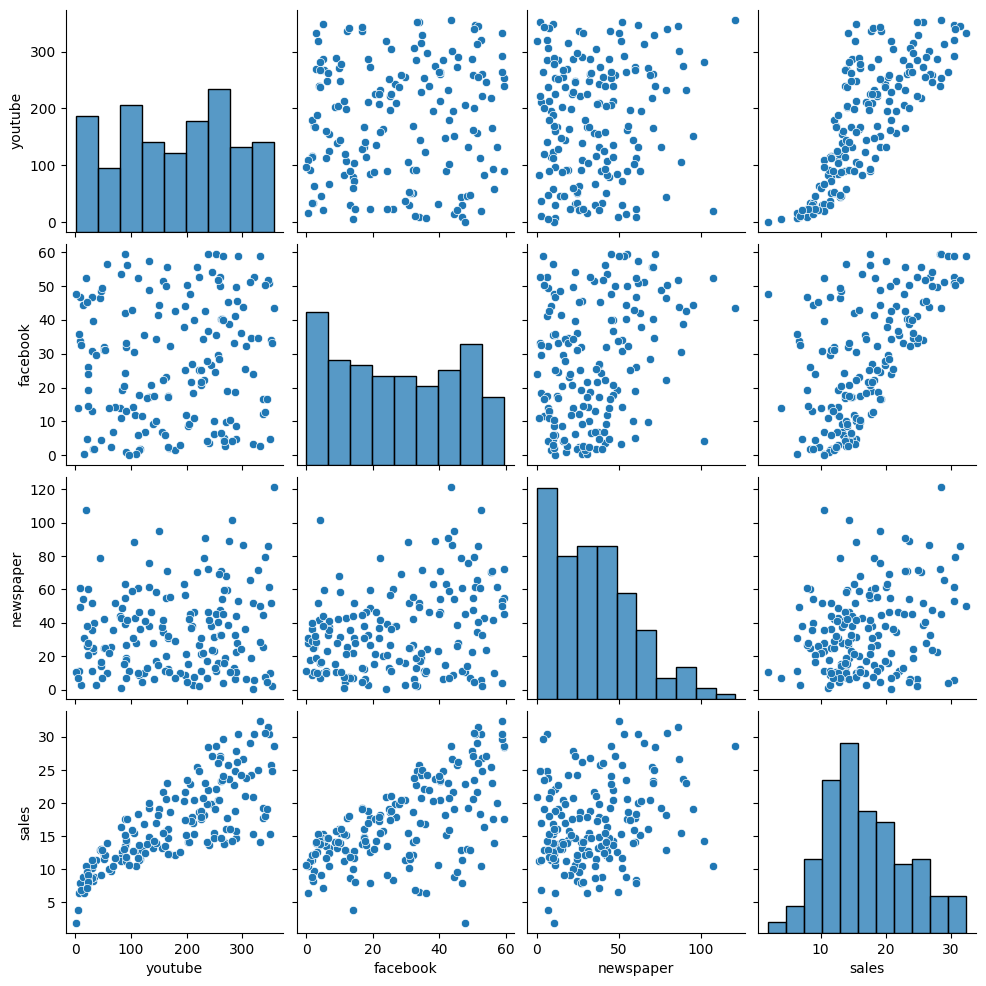

In [ ]:
sns.pairplot(dados_marketing)

In [ ]:
dados_marketing.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

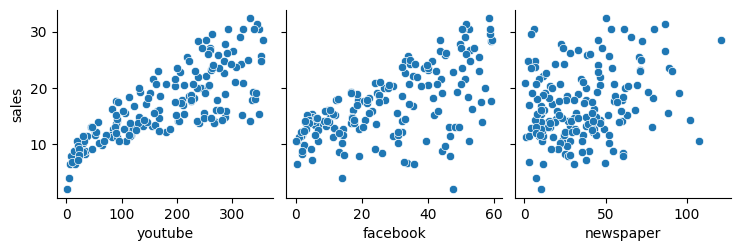

In [ ]:
sns.pairplot(dados_marketing, x_vars=['youtube', 'facebook', 'newspaper'], y_vars="sales")

In [ ]:
dados_marketing.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

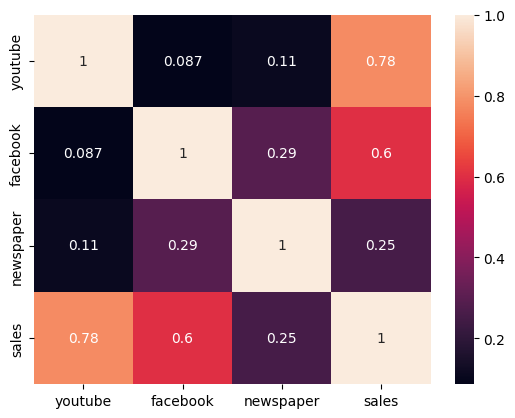

In [ ]:
sns.heatmap(dados_marketing.corr(),annot=True)

<Axes: xlabel='sales', ylabel='Count'>

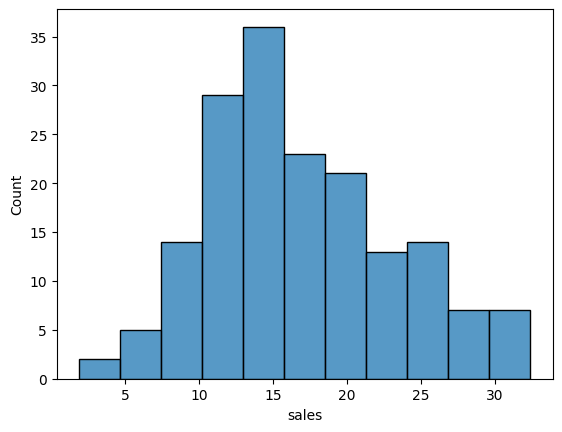

In [ ]:
sns.histplot(dados_marketing["sales"])

In [ ]:
import pandas as pd



In [ ]:
dados_marketing.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
X =dados_marketing[['youtube', 'facebook', 'newspaper']]
Y =dados_marketing[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split( X, Y, train_size=0.7, test_size= 0.3,  random_state=30)

In [ ]:
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm= LinearRegression()

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred=lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r =r2_score(Y_test, y_pred)

In [ ]:
print("r_quadrado:", r)

r_quadrado: 0.8612578664581378


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#premissa do negócio


In [ ]:
agg_face_sales=60
agg_you_sales=80
agg_news_sales=30
entrada=[[agg_face_sales, agg_news_sales, agg_you_sales]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.25491981])